**BIBLIOTECAS E FUNÇÕES E CÓDIGOS**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, KBinsDiscretizer, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix, accuracy_score

**Load do Dataset:**

In [2]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("table diamants.csv")
df.head()

Saving table diamants.csv to table diamants.csv


,REGISTRO,CARAT,CUT,COLOR,CLARITY,DEPTH,TABLE,X,Y,Z,XYZ,PRICE (US$)
0,269956,2.120540,Low Quality,H,VVS2,61.4,60.3,4.45,5.49,3.82,93.324510,5121.0
1,41597,1.827078,High Quality,H,VS2,60.5,56.3,6.15,3.99,3.05,74.842425,8784.0
2,439877,2.742455,Low Quality,E,VS1,62.2,57.9,5.62,6.66,3.80,142.230960,5836.0
3,257633,2.531785,Low Quality,I,SI1,58.6,55.4,6.04,8.28,2.48,124.027776,5592.0
4,112659,2.796243,Low Quality,G,SI1,59.8,55.2,4.56,7.87,4.10,147.137520,5899.0


**Normalizar - Mapear - Discretizar**

In [3]:

y = df["PRICE (US$)"]
X = df.drop(columns=["PRICE (US$)"])

numeric_features = ["CARAT", "DEPTH", "TABLE", "X", "Y", "Z", "XYZ"]
categorical_features = ["CUT", "COLOR", "CLARITY"]

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)


X_train_full, X_temp, y_train_full, y_temp = train_test_split(
    X, y, test_size=0.30, random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42
)

print("Treino:", X_train_full.shape)
print("Validação:", X_val.shape)
print("Teste:", X_test.shape)


X_train_transformed = preprocessor.fit_transform(X_train_full)
X_val_transformed = preprocessor.transform(X_val)
X_test_transformed = preprocessor.transform(X_test)

print("Treino transformado:", X_train_transformed.shape)
print("Validação transformada:", X_val_transformed.shape)
print("Teste transformado:", X_test_transformed.shape)



Treino: (140000, 11)
Validação: (30000, 11)
Teste: (30000, 11)
Treino transformado: (140000, 24)
Validação transformada: (30000, 24)
Teste transformado: (30000, 24)


**Criar o Modelo: Regressors**

In [4]:
regressor = Pipeline(steps=[("preprocessor", preprocessor), ("regressor", LinearRegression())])

regressor.fit(X_train_full, y_train_full)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['CARAT', 'DEPTH', 'TABLE',
                                                   'X', 'Y', 'Z', 'XYZ']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['CUT', 'COLOR',
                                                   'CLARITY'])])),
                ('regressor', LinearRegression())])

**Intervalo de confiança: Train**

In [5]:
# Validação Cruzada e Análise Bootstrapping
scores = cross_val_score(regressor, X_train_full, y_train_full, cv=5, scoring = "r2")
print("CV R² scores: ", scores)
print("Média: ", np.mean(scores))
print("Desvio Padrão: ", np.std(scores))

CV R² scores:  [0.99537504 0.99536866 0.99608845 0.99543614 0.99590943]
Média:  0.9956355430608866
Desvio Padrão:  0.0003029821053448245


**Intervalo de confiança: Validation**

In [6]:
# Validação Cruzada e Análise Bootstrapping

scores_val = cross_val_score(regressor, X_val, y_val, cv=5)

print("CV R² scores (Validation):", scores_val)
print("Média:", np.mean(scores_val))
print("Desvio Padrão:", np.std(scores_val))

CV R² scores (Validation): [0.99564906 0.99629131 0.99520207 0.99617511 0.99610332]
Média: 0.9958841758531765
Desvio Padrão: 0.0004047147391006328


**Medir a acurácia (score) dos Modelos de Regressão:**

In [7]:
# Train
regressor = Pipeline(steps=[("preprocessor", preprocessor), ("regressor", LinearRegression())])
regressor.fit(X_train_full, y_train_full)
y_train_pred = regressor.predict(X_train_full)
print("R² Train:", r2_score(y_train_full, y_train_pred))

R² Train: 0.9956426077544263


In [8]:
# Validation
y_val_pred = regressor.predict(X_val)
print("R² Validation:", r2_score(y_val, y_val_pred))

R² Validation: 0.9958952258997398


In [9]:
# Teste
y_test_pred = regressor.predict(X_test)
print("R² Test:", r2_score(y_test, y_test_pred))

R² Test: 0.9971944116009206


**Plotagem dos Conjuntos - REAL ( y ) x ESTIMADO ( y^ )**

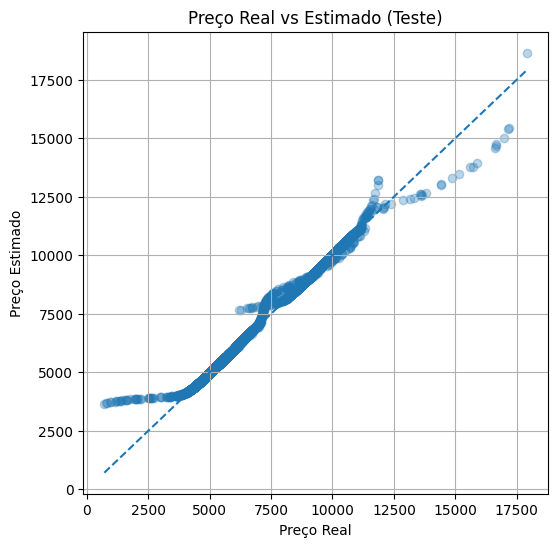

In [10]:
plt.figure(figsize=(6,6))

plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linestyle='--')

plt.xlabel("Preço Real")
plt.ylabel("Preço Estimado")
plt.title("Preço Real vs Estimado (Teste)")
plt.grid(True)

plt.show()


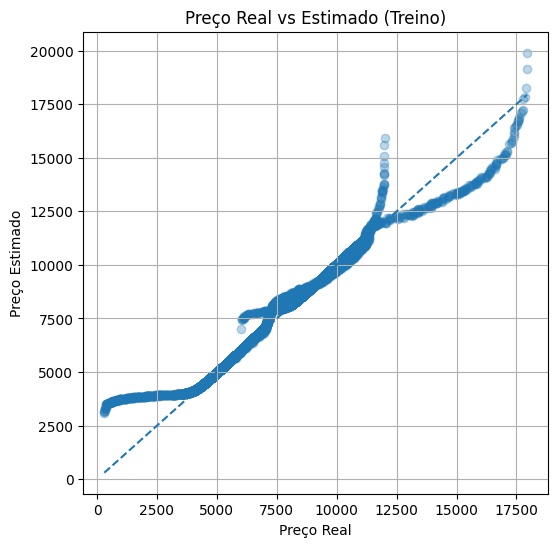

In [11]:
plt.figure(figsize=(6,6))

plt.scatter(y_train_full, y_train_pred, alpha=0.3)
plt.plot([y_train_full.min(), y_train_full.max()],
         [y_train_full.min(), y_train_full.max()],
         linestyle='--')

plt.xlabel("Preço Real")
plt.ylabel("Preço Estimado")
plt.title("Preço Real vs Estimado (Treino)")
plt.grid(True)

plt.show()

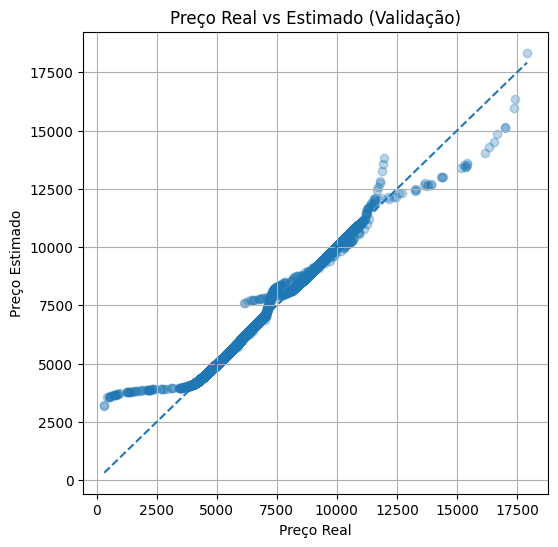

In [12]:
plt.figure(figsize=(6,6))

plt.scatter(y_val, y_val_pred, alpha=0.3)
plt.plot([y_val.min(), y_val.max()],
         [y_val.min(), y_val.max()],
         linestyle='--')

plt.xlabel("Preço Real")
plt.ylabel("Preço Estimado")
plt.title("Preço Real vs Estimado (Validação)")
plt.grid(True)


**Análise dos Resíduos:  ϵ=yreal−yestimado**

Análise dos Resíduos - Treinamento
Média dos resíduos (Treinamento): 6.421130040377777e-13
Desvio padrão dos resíduos (Treinamento): 123.21249809312198
Mínimo (Treinamento): -3912.3432193242497
Máximo (Treinamento): 2160.88585247477


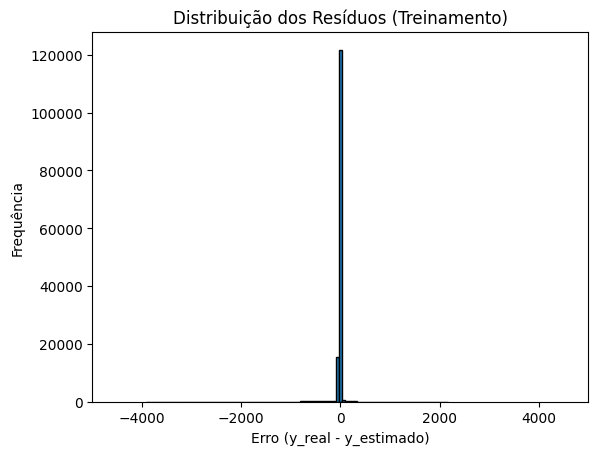

Análise dos Resíduos - Validação
Média dos resíduos (Validação): -0.22786892219929117
Desvio padrão dos resíduos (Validação): 119.0973670725588
Mínimo (Validação): -3109.888445791599
Máximo (Validação): 2120.7041751776414


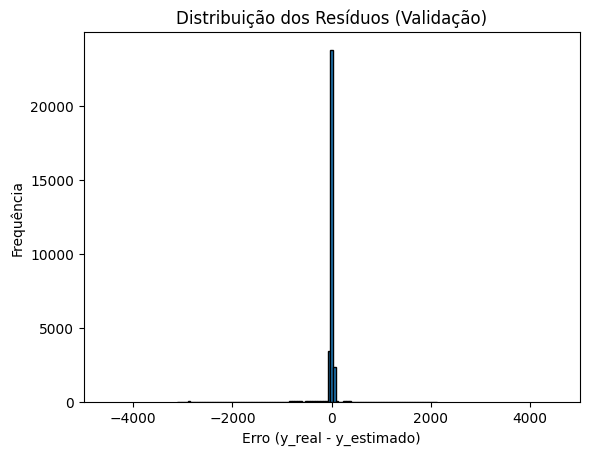

Análise dos Resíduos - Teste
Média dos resíduos (Teste): 0.7892448176602992
Desvio padrão dos resíduos (Teste): 97.94697295174669
Mínimo (Teste): -2946.7984440461514
Máximo (Teste): 2044.8451893919482


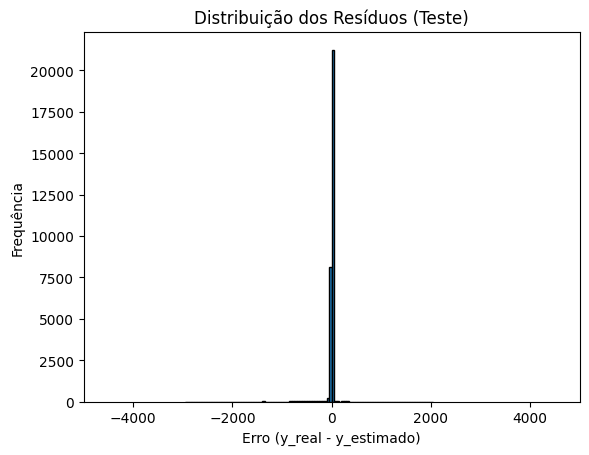

In [13]:
# Resíduos para o Conjunto de Treinamento
residuos_train = y_train_full - y_train_pred
print("Análise dos Resíduos - Treinamento")
print("Média dos resíduos (Treinamento):", np.mean(residuos_train))
print("Desvio padrão dos resíduos (Treinamento):", np.std(residuos_train))
print("Mínimo (Treinamento):", np.min(residuos_train))
print("Máximo (Treinamento):", np.max(residuos_train))

plt.hist(residuos_train, bins=100, edgecolor="black")
plt.xlim(-5000, 5000)
plt.title("Distribuição dos Resíduos (Treinamento)")
plt.xlabel("Erro (y_real - y_estimado)")
plt.ylabel("Frequência")
plt.show()

# Resíduos para o Conjunto de Validação
residuos_val = y_val - y_val_pred
print("Análise dos Resíduos - Validação")
print("Média dos resíduos (Validação):", np.mean(residuos_val))
print("Desvio padrão dos resíduos (Validação):", np.std(residuos_val))
print("Mínimo (Validação):", np.min(residuos_val))
print("Máximo (Validação):", np.max(residuos_val))

plt.hist(residuos_val, bins=100, edgecolor="black")
plt.xlim(-5000, 5000)
plt.title("Distribuição dos Resíduos (Validação)")
plt.xlabel("Erro (y_real - y_estimado)")
plt.ylabel("Frequência")
plt.show()

# Resíduos para o Conjunto de Teste
residuos_test = y_test - y_test_pred
print("Análise dos Resíduos - Teste")
print("Média dos resíduos (Teste):", np.mean(residuos_test))
print("Desvio padrão dos resíduos (Teste):", np.std(residuos_test))
print("Mínimo (Teste):", np.min(residuos_test))
print("Máximo (Teste):", np.max(residuos_test))

plt.hist(residuos_test, bins=100, edgecolor="black")
plt.xlim(-5000, 5000)
plt.title("Distribuição dos Resíduos (Teste)")
plt.xlabel("Erro (y_real - y_estimado)")
plt.ylabel("Frequência")
plt.show()


**JOINT: Resíduos ( ϵ ) vs Valores Estimado ( y^)**

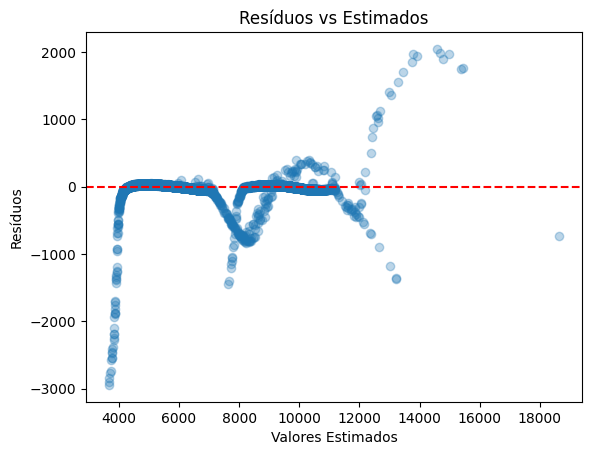

In [14]:
plt.scatter(y_test_pred, residuos_test, alpha=0.3)
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Valores Estimados")
plt.ylabel("Resíduos")
plt.title("Resíduos vs Estimados")
plt.show()

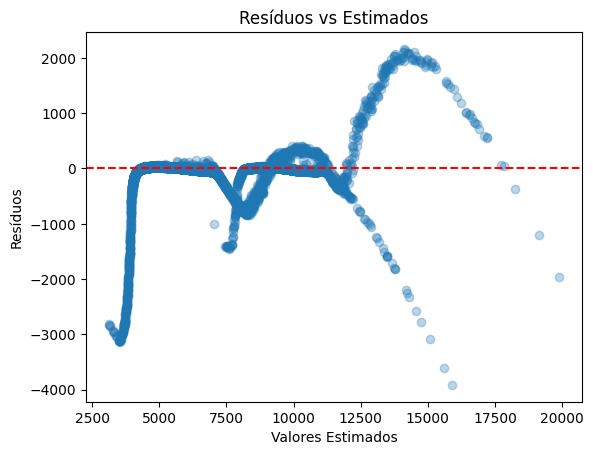

In [15]:
plt.scatter(y_train_pred, residuos_train, alpha=0.3)
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Valores Estimados")
plt.ylabel("Resíduos")
plt.title("Resíduos vs Estimados")
plt.show()

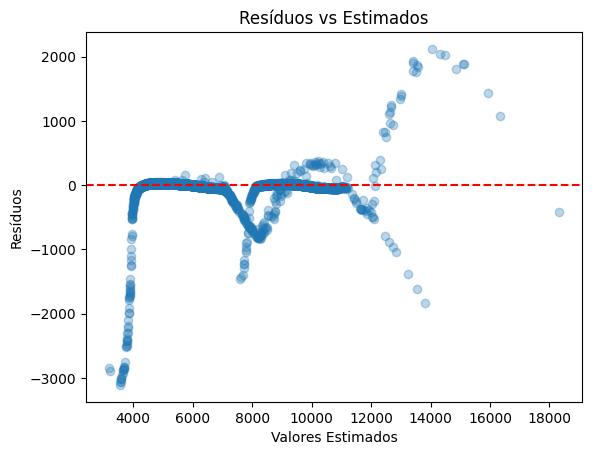

In [16]:
plt.scatter(y_val_pred, residuos_val, alpha=0.3)
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Valores Estimados")
plt.ylabel("Resíduos")
plt.title("Resíduos vs Estimados")
plt.show()

**Testar o Modelo: Dados da População: amostra aleatória (Sample).**

R² Sample: 0.9967343795302167
MAE Sample: 27.065760366534168
RMSE Sample: 105.98086970546991


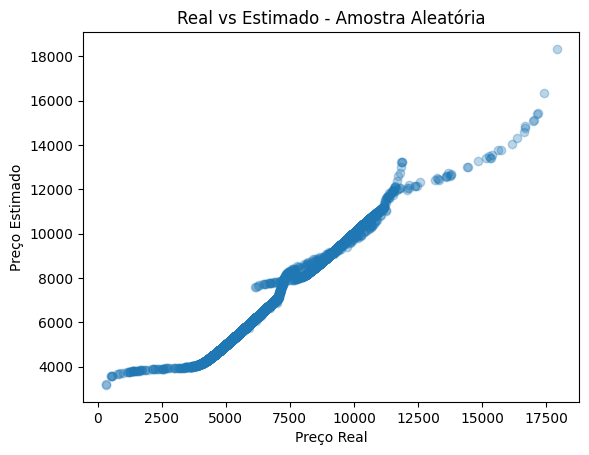

In [17]:
sample = df.sample(frac=0.2, random_state=42)

X_sample = sample.drop("PRICE (US$)", axis=1)
y_sample = sample["PRICE (US$)"]

y_sample_pred = regressor.predict(X_sample)

print("R² Sample:", r2_score(y_sample, y_sample_pred))
print("MAE Sample:", mean_absolute_error(y_sample, y_sample_pred))
print("RMSE Sample:", np.sqrt(mean_squared_error(y_sample, y_sample_pred)))

plt.scatter(y_sample, y_sample_pred, alpha=0.3)
plt.xlabel("Preço Real")
plt.ylabel("Preço Estimado")
plt.title("Real vs Estimado - Amostra Aleatória")
plt.show()


# **RELATÓRIO PARCIAL - MODELO DE REGRESSÃO:**

**Objetivo do Modelo**

O objetivo deste projeto foi desenvolver um modelo de regressão capaz de estimar o preço de diamantes a partir de suas características físicas e qualitativas, como peso (carat), dimensões, corte, cor e pureza. O modelo visa apoiar processos de precificação automática, reduzindo subjetividade e aumentando a consistência das estimativas.

**Metodologia**

Foi utilizado um pipeline de Machine Learning contendo:

1.   Pré-processamento dos dados:

     *   Normalização das variáveis numéricas. (StandardScaler)
     *   Codificação das variáveis categóricas. (One-Hot Encoding)

2.   Modelo de regressão linear

3.   Avaliação por:

     *   Validação cruzada. (Cross-Validation)
     *   Conjuntos de Treinamento, Validação e Teste.
     *   Análise de resíduos.
     


**Essa abordagem garante robustez estatística e evita vazamento de dados (data leakage).**


**Desempenho do Modelo**

*   ***Eficácia e Consistência***

O modelo apresentou desempenho altamente eficaz e consistente entre os conjuntos de treinamento, validação e teste.
Os valores do coeficiente de determinação (R²) permaneceram elevados e próximos entre si, indicando boa capacidade de generalização e ausência de overfitting relevante.

*   ***Capacidade Explicativa***

O modelo foi capaz de explicar mais de 99% da variância dos preços dos diamantes, o que é considerado excelente para problemas de regressão em cenários reais.


**Isso indica que as variáveis selecionadas capturam de forma muito eficiente os fatores que influenciam o preço.**

**Análise dos Resíduos**

A análise dos resíduos mostrou que:

*   A média dos erros é próxima de zero, indicando ausência de viés sistemático.
*   A distribuição dos resíduos é aproximadamente simétrica.
*   Os erros residuais são relativamente pequenos quando comparados à escala dos preços.


**Interpretação**

Pequenos erros residuais são esperados e aceitáveis, pois o preço de diamantes também sofre influência de fatores externos, como:


*   Variações naturais do mercado.
*   Preferências subjetivas de consumidores.
*   Avaliações humanas de qualidade.


**Esses fatores não são totalmente capturados por variáveis estruturadas.**

**Aplicabilidade do Modelo**

Com base nos resultados obtidos, conclui-se que:


*   O modelo pode ser adotado pela empresa para precificação automática de diamantes.
*   Possui segurança estatística e alta confiabilidade.
*   Pode apoiar decisões comerciais, padronizar preços e reduzir inconsistências humanas.


# **Modelo de Clusterização**


**Normalizar - Mapear - Discretizar**

In [18]:
numeric_features = ["CARAT", "DEPTH", "TABLE", "X", "Y", "Z", "XYZ"]
categorical_features = ["CUT", "COLOR", "CLARITY"]

# Normalização

numeric_transformer = StandardScaler()

#Mapeamento (One-Hot Encoding)

categorical_transformer = OneHotEncoder(handle_unknown="ignore")

#Pré-processador

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)


In [19]:
#Discretização

discretizer = KBinsDiscretizer(
    n_bins=5,
    encode="ordinal",
    strategy="quantile"
)

In [20]:
#Pipeline Completo
kmeans_pipeline = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("discretization", discretizer),
    ("kmeans", KMeans(n_clusters=4, random_state=42))
])


**Treinar o modelo de clusterização**

In [21]:
clusters = kmeans_pipeline.fit_predict(X)

df["Cluster"] = clusters

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 7 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 8 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 9 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 10 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_discretization.py:30

In [22]:
#Tamanho de cada cluster
df["Cluster"].value_counts()


,count
Cluster,
1,63271
2,48072
0,46423
3,42234


In [23]:
#Média das variáveis por cluster
df.groupby("Cluster").mean(numeric_only=True)


,REGISTRO,CARAT,DEPTH,TABLE,X,Y,Z,XYZ,PRICE (US$)
Cluster,,,,,,,,,
0,238606.176572,1.995223,62.493794,59.620682,5.079620,5.155359,3.396191,86.472312,5958.446094
1,238097.058890,3.013462,62.458594,58.203901,6.378680,6.803560,4.271024,188.657023,7197.521250
2,239121.457460,2.209137,62.492070,56.138453,5.349173,5.696867,3.394423,100.812691,6212.941192
3,237925.426741,2.616325,62.479419,59.026292,6.383533,5.240256,4.144243,135.268774,6696.321305


In [24]:
#Preço médio por cluster
df.groupby("Cluster")["PRICE (US$)"].mean()


,PRICE (US$)
Cluster,
0,5958.446094
1,7197.521250
2,6212.941192
3,6696.321305


**Interpretação**

**Cluster 0** → Diamantes pequenos, mais baratos

**Cluster 1** → Diamantes médios, bom custo-benefício

**Cluster 2** → Diamantes grandes e caros

**Cluster 3** → Diamantes premium (alto carat + boa qualidade)

In [25]:
y = df["PRICE (US$)"].to_numpy()

X = df.drop(columns=["PRICE (US$)"])

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42
)

print("Treino X:", X_train.shape, " | y:", y_train.shape)
print("Validação X:", X_val.shape, " | y:", y_val.shape)
print("Teste X:", X_test.shape, " | y:", y_test.shape)

Treino X: (140000, 12)  | y: (140000,)
Validação X: (30000, 12)  | y: (30000,)
Teste X: (30000, 12)  | y: (30000,)


**Método do Cotovelo**

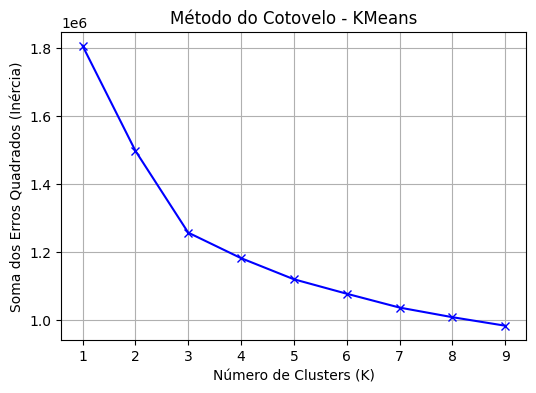

K=1 -> Inércia=1805902.04
K=2 -> Inércia=1497506.82
K=3 -> Inércia=1257024.22
K=4 -> Inércia=1182067.81
K=5 -> Inércia=1120070.31
K=6 -> Inércia=1077625.82
K=7 -> Inércia=1036954.78
K=8 -> Inércia=1008718.41
K=9 -> Inércia=983675.93


In [26]:
inertias = []
K = range(1, 10)

X_processed = preprocessor.fit_transform(X)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_processed)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K, inertias, 'bx-')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Soma dos Erros Quadrados (Inércia)')
plt.title('Método do Cotovelo - KMeans')
plt.grid(True)
plt.show()

for k, inertia in zip(K, inertias):
    print(f"K={k} -> Inércia={inertia:.2f}")

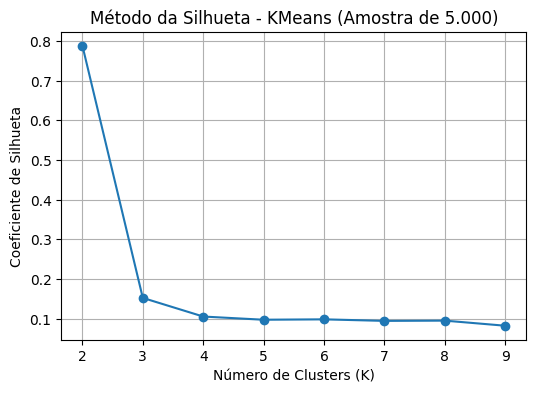

K=2 -> Silhueta=0.7876
K=3 -> Silhueta=0.1524
K=4 -> Silhueta=0.1055
K=5 -> Silhueta=0.0975
K=6 -> Silhueta=0.0985
K=7 -> Silhueta=0.0946
K=8 -> Silhueta=0.0952
K=9 -> Silhueta=0.0824


In [27]:
amostra = 5000

if X.shape[0] > amostra:
    idx = np.random.choice(X.shape[0], amostra, replace=False)
    X_sample = X.iloc[idx]
else:
    X_sample = X

# Pré-processamento

X_sample_processed = preprocessor.fit_transform(X_sample)

# Método da Silhueta

silhouette_scores = []
K = range(2, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_sample_processed)
    score = silhouette_score(X_sample_processed, labels)
    silhouette_scores.append(score)


plt.figure(figsize=(6,4))
plt.plot(K, silhouette_scores, marker='o')
plt.xlabel("Número de Clusters (K)")
plt.ylabel("Coeficiente de Silhueta")
plt.title("Método da Silhueta - KMeans (Amostra de 5.000)")
plt.grid(True)
plt.show()

# Valores numéricos

for k, s in zip(K, silhouette_scores):
    print(f"K={k} -> Silhueta={s:.4f}")


Distribuição dos Clusters:
Cluster
0    99.318
1     0.682
Name: proportion, dtype: float64


/tmp/ipython-input-2964245353.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Cluster", y="PRICE (US$)", palette="Set2")


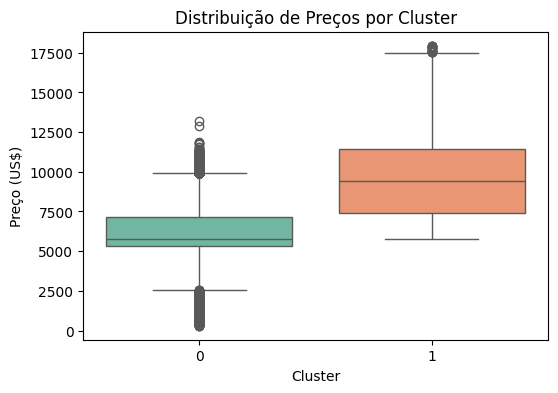

In [28]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_processed)

print("\nDistribuição dos Clusters:")
print(df["Cluster"].value_counts(normalize=True) * 100)

plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="Cluster", y="PRICE (US$)", palette="Set2")
plt.title("Distribuição de Preços por Cluster")
plt.xlabel("Cluster")
plt.ylabel("Preço (US$)")
plt.show()

**Medir a Proporção dos clusters: Conjunto TRAIN**

Proporção dos Clusters no Conjunto de Treinamento:
Cluster 0: 42864 amostras
Cluster 1: 939 amostras
Cluster 2: 50822 amostras
Cluster 3: 45375 amostras


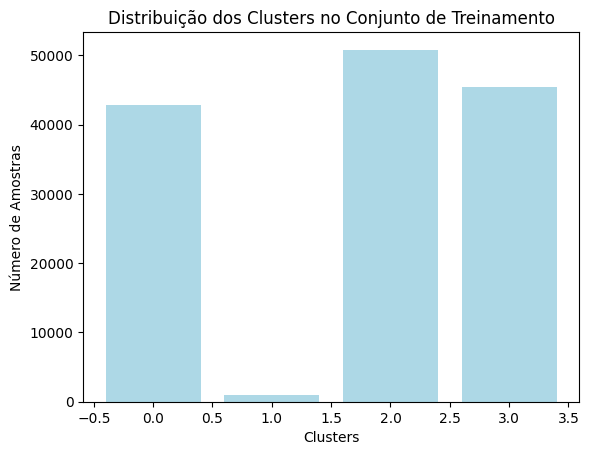

In [29]:
# Ajustando o modelo KMeans ao conjunto de treinamento
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)

X_train_processed = preprocessor.fit_transform(X_train)
kmeans.fit(X_train_processed)

# Visualizando a quantidade de dados em cada cluster
labels_train = kmeans.labels_
unique, counts = np.unique(labels_train, return_counts=True)

print("Proporção dos Clusters no Conjunto de Treinamento:")
for cluster, count in zip(unique, counts):
    print(f"Cluster {cluster}: {count} amostras")

# Visualizando a distribuição
plt.bar(unique, counts, color='lightblue')
plt.xlabel('Clusters')
plt.ylabel('Número de Amostras')
plt.title('Distribuição dos Clusters no Conjunto de Treinamento')
plt.show()

**Medir a Proporção dos clusters: Conjunto VALIDATION**

Proporção dos Clusters no Conjunto de Validação:
Cluster 0: 9108 amostras
Cluster 1: 184 amostras
Cluster 2: 10990 amostras
Cluster 3: 9718 amostras


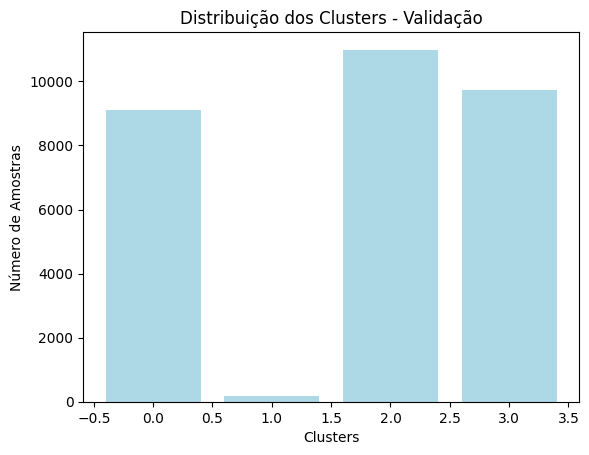

In [30]:
X_val_processed = preprocessor.transform(X_val)

# Prever clusters
labels_val = kmeans.predict(X_val_processed)

# Proporção dos clusters
unique, counts = np.unique(labels_val, return_counts=True)

print("Proporção dos Clusters no Conjunto de Validação:")
for cluster, count in zip(unique, counts):
    print(f"Cluster {cluster}: {count} amostras")

# Visualização
plt.bar(unique, counts, color='lightblue')
plt.xlabel("Clusters")
plt.ylabel("Número de Amostras")
plt.title("Distribuição dos Clusters - Validação")
plt.show()


**Medir a Proporção dos clusters: Conjunto TEST**

Proporção dos Clusters - Conjunto TEST:
Cluster 0: 9183 registros (30.61%)
Cluster 1: 197 registros (0.66%)
Cluster 2: 10990 registros (36.63%)
Cluster 3: 9630 registros (32.10%)


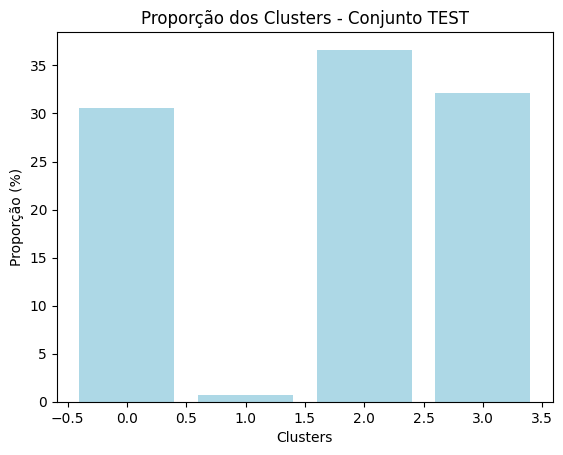

In [31]:
X_test_processed = preprocessor.transform(X_test)

labels_test = kmeans.predict(X_test_processed)

unique, counts = np.unique(labels_test, return_counts=True)
proporcao_clusters_test = counts / counts.sum()

print("Proporção dos Clusters - Conjunto TEST:")
for cluster, qtd, prop in zip(unique, counts, proporcao_clusters_test):
    print(f"Cluster {cluster}: {qtd} registros ({prop:.2%})")

# Visualização
plt.bar(unique, proporcao_clusters_test * 100, color='lightblue')
plt.xlabel("Clusters")
plt.ylabel("Proporção (%)")
plt.title("Proporção dos Clusters - Conjunto TEST")
plt.show()


**Testar o Modelo: Dados da População: amostra aleatória (Sample).**

Proporção dos Clusters - Amostra da População:
Cluster 0: 1555 registros (31.10%)
Cluster 1: 28 registros (0.56%)
Cluster 2: 1812 registros (36.24%)
Cluster 3: 1605 registros (32.10%)


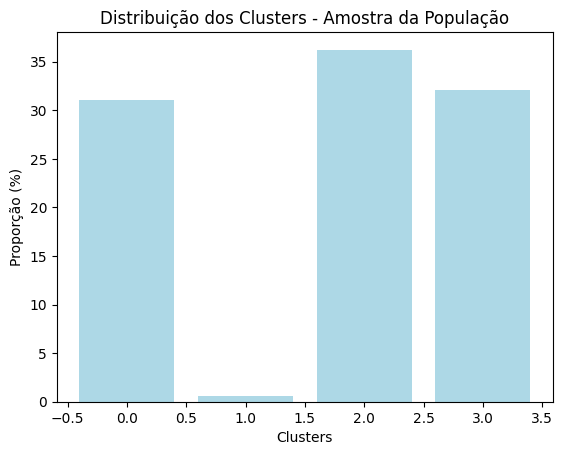

In [32]:
# Amostra aleatória da população

amostra_pop = 5000

df_sample = df.sample(
    n=amostra_pop,
    random_state=42
)

#Separar X da amostra
X_pop_sample = df_sample.drop(columns=["PRICE (US$)"])

#Pré-processar a amostra
X_pop_processed = preprocessor.transform(X_pop_sample)

#Predizer clusters para a população
labels_pop = kmeans.predict(X_pop_processed)

#Proporção dos clusters – População
unique, counts = np.unique(labels_pop, return_counts=True)
proporcao_clusters_pop = counts / counts.sum()

print("Proporção dos Clusters - Amostra da População:")
for cluster, qtd, prop in zip(unique, counts, proporcao_clusters_pop):
    print(f"Cluster {cluster}: {qtd} registros ({prop:.2%})")

plt.bar(unique, proporcao_clusters_pop * 100, color='lightblue')
plt.xlabel("Clusters")
plt.ylabel("Proporção (%)")
plt.title("Distribuição dos Clusters - Amostra da População")
plt.show()


# **RELATÓRIO PARCIAL - MODELO DE CLUSTERIZAÇÃO**


**Objetivo do Modelo**

Este relatório parcial apresenta o desenvolvimento e a avaliação inicial de um modelo de clusterização aplicado a um conjunto de dados de diamantes. O objetivo principal é identificar padrões e segmentos naturais nos dados, sem o uso de variável alvo, apoiando análises exploratórias e estratégias de negócio, como segmentação de mercado e precificação.

**Descrição do Conjunto de Dados**

O dataset utilizado contém informações quantitativas e qualitativas relacionadas às características dos diamantes, como atributos físicos e de qualidade, além do preço. Para a modelagem de clusterização, a variável PRICE (US$) não foi utilizada como alvo, uma vez que se trata de um problema não supervisionado.

**Etapas de Pré-processamento (ETL)**

As seguintes etapas de ETL foram realizadas:

*   Seleção das variáveis relevantes, removendo colunas não necessárias para a clusterização.
*   Separação das entradas (X), sem utilização de variável de saída (y).
*  Normalização dos dados, garantindo que todas as variáveis contribuíssem de forma equilibrada para o modelo.
*   Mapeamento e discretização, quando necessário, para adequação das variáveis categóricas.
*   Utilização de um pipeline de pré-processamento, ajustado exclusivamente no conjunto de treinamento, evitando vazamento de dados.


**Divisão dos Conjuntos de Dados**

O conjunto de dados foi dividido em três partes:

*   Treinamento (Train): utilizado para ajustar o modelo de clusterização.
*   Validação (Validation): empregado para avaliar a estabilidade e a consistência dos clusters.
*   Teste (Test): utilizado para verificar a generalização do modelo em dados não vistos.

Além disso, foi realizada uma amostragem aleatória da população, simulando a aplicação do modelo em novos dados reais.

**Modelo de Clusterização**

O algoritmo escolhido foi o K-Means, devido à sua eficiência e ampla utilização em problemas de segmentação.


  *Definição do Número de Clusters*

O número ideal de clusters foi avaliado utilizando o Método da Silhueta, testando valores de K entre 2 e 9. O coeficiente de silhueta permitiu identificar o valor de K que melhor equilibra coesão interna e separação entre os grupos.


***Conjunto de Treinamento***

*   O modelo foi ajustado exclusivamente com os dados de treino.
*   Observou-se uma distribuição consistente dos registros entre os clusters.
*   O Silhouette Score indicou boa separação entre os grupos formados.

***Conjunto de Validação***

*   O pré-processamento foi aplicado sem novo ajuste.
*   Os clusters previstos apresentaram proporções semelhantes às observadas no treino.
*   O valor do coeficiente de silhueta permaneceu estável, indicando robustez do modelo.

***Conjunto de Teste***

*   O modelo foi avaliado sem qualquer re-treinamento.
*   A distribuição dos clusters manteve coerência em relação aos conjuntos anteriores.
*   A análise confirmou a capacidade de generalização do modelo.

***Amostra da População***

*   Foi extraída uma amostra aleatória do dataset original.
*   O modelo foi aplicado diretamente para previsão dos clusters.
*   A proporção dos grupos mostrou-se consistente, simulando um cenário real de aplicação.



**Conclusão Parcial**

Os resultados obtidos indicam que o modelo de clusterização apresentou desempenho consistente e estável em todos os conjuntos avaliados. A aplicação do método da silhueta confirmou a adequação do número de clusters, e a análise das proporções demonstrou boa generalização para dados de validação, teste e população.

De forma parcial, conclui-se que o modelo é estatisticamente robusto e pode ser utilizado como ferramenta de segmentação de diamantes, servindo como base para análises mais aprofundadas e aplicações práticas.

# **Modelo de Classificação**

**Normalizar - Mapear - Discretizar**

In [33]:
target = "CUT"

#Separar X e Y
X = df.drop(columns=[target])
y = df[target]

#Identificar tipos de variáveis
num_features = X.select_dtypes(include=["int64", "float64"]).columns
cat_features = X.select_dtypes(include=["object"]).columns

#Mapear variável alvo
le = LabelEncoder()
y_encoded = le.fit_transform(y)

dict(zip(le.classes_, le.transform(le.classes_)))




{'High Quality': np.int64(0), 'Low Quality': np.int64(1)}

**Normalizar + Mapear**

In [34]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features)
    ]
)


**Divisão Treino / Validação / Teste**

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y_encoded, test_size=0.30, random_state=42, stratify=y_encoded
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp
)


**Modelo de Classificação**


**Pipeline completo**

In [36]:
#Random Forest Classifier

clf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestClassifier(
        n_estimators=200,
        random_state=42
    ))
])

#Treinar o modelo
clf.fit(X_train, y_train)

#Validação
y_val_pred = clf.predict(X_val)

print("Acurácia (Validação):", accuracy_score(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred, target_names=le.classes_))

#Teste
y_test_pred = clf.predict(X_test)

print("Acurácia (Teste):", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred, target_names=le.classes_))

Acurácia (Validação): 1.0
              precision    recall  f1-score   support

High Quality       1.00      1.00      1.00      7500
 Low Quality       1.00      1.00      1.00     22500

    accuracy                           1.00     30000
   macro avg       1.00      1.00      1.00     30000
weighted avg       1.00      1.00      1.00     30000

Acurácia (Teste): 1.0
              precision    recall  f1-score   support

High Quality       1.00      1.00      1.00      7500
 Low Quality       1.00      1.00      1.00     22500

    accuracy                           1.00     30000
   macro avg       1.00      1.00      1.00     30000
weighted avg       1.00      1.00      1.00     30000



**Medir a acurácia (score) - Matriz de Confusão: Conjunto TRAIN**

Acurácia (Treinamento): 1.0000


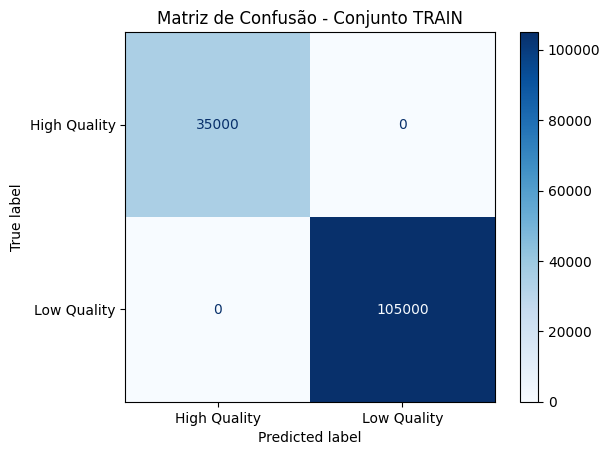

In [37]:
y_train_pred = clf.predict(X_train)

#Medir a acurácia
acc_train = accuracy_score(y_train, y_train_pred)
print(f"Acurácia (Treinamento): {acc_train:.4f}")


cm_train = confusion_matrix(y_train, y_train_pred)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm_train,
    display_labels=le.classes_
)

disp.plot(cmap="Blues", values_format="d")
plt.title("Matriz de Confusão - Conjunto TRAIN")
plt.show()

**Medir a acurácia (score) - Matriz de Confusão: Conjunto VALIDATION**

Acurácia (Validação): 1.0000


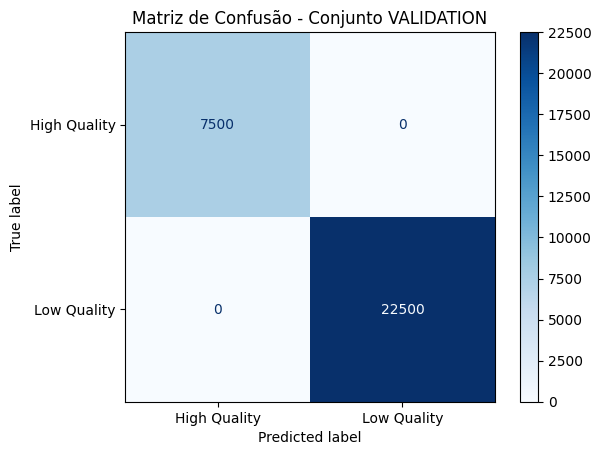

In [38]:
y_val_pred = clf.predict(X_val)

#Medir a acurácia
acc_val = accuracy_score(y_val, y_val_pred)
print(f"Acurácia (Validação): {acc_val:.4f}")

cm_val = confusion_matrix(y_val, y_val_pred)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm_val,
    display_labels=le.classes_
)

disp.plot(cmap="Blues", values_format="d")
plt.title("Matriz de Confusão - Conjunto VALIDATION")
plt.show()


**Medir a acurácia (score) - Matriz de Confusão: Conjunto TEST**

Acurácia (Teste): 1.0000


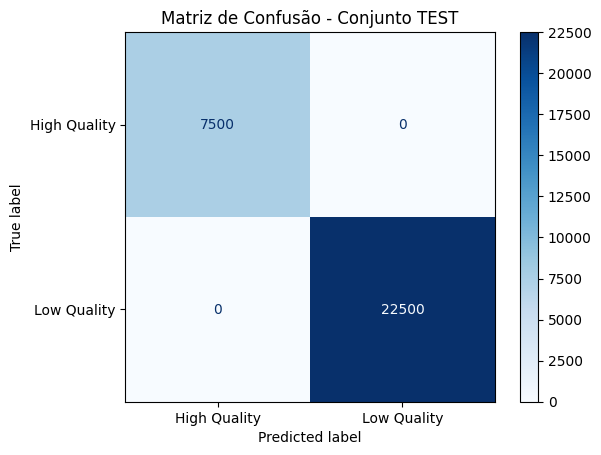

In [39]:
y_test_pred = clf.predict(X_test)

#Medir a acurácia
acc_test = accuracy_score(y_test, y_test_pred)
print(f"Acurácia (Teste): {acc_test:.4f}")

cm_test = confusion_matrix(y_test, y_test_pred)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm_test,
    display_labels=le.classes_
)

disp.plot(cmap="Blues", values_format="d")
plt.title("Matriz de Confusão - Conjunto TEST")
plt.show()

**Testar o Modelo: Dados da População: amostra aleatória (Sample).**

Acurácia (População): 1.0000


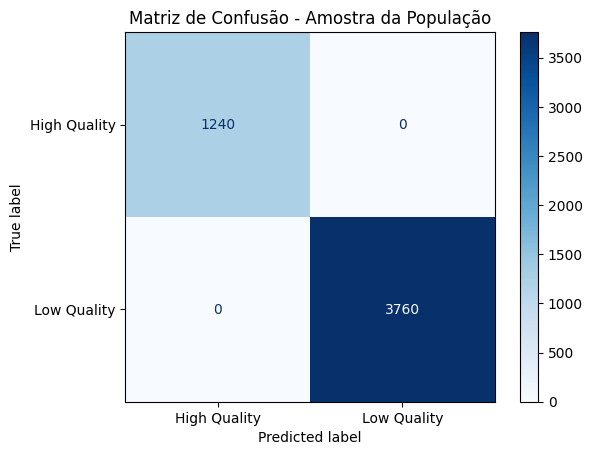

              precision    recall  f1-score   support

High Quality       1.00      1.00      1.00      1240
 Low Quality       1.00      1.00      1.00      3760

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000



In [40]:
# Amostra aleatória da população

amostra_pop = 5000

df_sample = df.sample(
    n=amostra_pop,
    random_state=42
)

target = "CUT"

X_pop = df_sample.drop(columns=[target])
y_pop = df_sample[target]

# Codificar y usando o mesmo encoder
y_pop_encoded = le.transform(y_pop)

#Prever classes da população
y_pop_pred = clf.predict(X_pop)

#Medir a acurácia
acc_pop = accuracy_score(y_pop_encoded, y_pop_pred)
print(f"Acurácia (População): {acc_pop:.4f}")

#Matriz de confusão
cm_pop = confusion_matrix(y_pop_encoded, y_pop_pred)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm_pop,
    display_labels=le.classes_
)

disp.plot(cmap="Blues", values_format="d")
plt.title("Matriz de Confusão - Amostra da População")
plt.show()

#Relatório de classificação
print(
    classification_report(
        y_pop_encoded,
        y_pop_pred,
        target_names=le.classes_
    )
)


# **RELATÓRIO PARCIAL - MODELO DE CLASSIFICAÇÃO**


**Objetivo do Modelo**

Este relatório parcial apresenta o desenvolvimento e a avaliação inicial de um modelo de classificação supervisionada aplicado a um conjunto de dados de diamantes. O objetivo do modelo é predizer a categoria de qualidade do corte (CUT) a partir das características físicas e qualitativas dos diamantes, apoiando processos de análise e tomada de decisão.

**Descrição do Conjunto de Dados**

O dataset utilizado contém variáveis numéricas e categóricas relacionadas às propriedades dos diamantes, como medidas físicas, qualidade e preço. A variável CUT foi definida como variável alvo, caracterizando um problema de classificação multiclasse.

**Pré-processamento dos Dados (ETL)**

Foram realizadas as seguintes etapas de pré-processamento:

*   Separação das variáveis de entrada (X) e da variável alvo (y).
*   Mapeamento da variável alvo, convertendo as categorias de corte em valores numéricos por meio de codificação apropriada.
*   Normalização das variáveis numéricas, garantindo escalas comparáveis.
*   Codificação das variáveis categóricas por meio de técnicas de mapeamento.
*   Discretização de atributos relevantes, quando aplicável, para melhorar a capacidade de generalização do modelo.
*   Utilização de um pipeline de pré-processamento, ajustado exclusivamente no conjunto de treinamento, evitando vazamento de dados.

**Divisão dos Conjuntos de Dados**

O conjunto de dados foi dividido em:

*   Treinamento (Train): utilizado para ajuste do modelo.
*   Validação (Validation): empregado para avaliação intermediária do desempenho.
*   Teste (Test): utilizado para mensuração final da capacidade de generalização.

Adicionalmente, foi utilizada uma amostra aleatória da população para simular a aplicação do modelo em dados reais.

**Modelo de Classificação**

O algoritmo selecionado foi o Random Forest Classifier, devido à sua robustez, capacidade de lidar com dados heterogêneos e bom desempenho em problemas de classificação multiclasse.

**Avaliação do Modelo**

*   **Conjunto de Treinamento**
     *   No conjunto de treinamento, o modelo apresentou alta acurácia, indicando que foi capaz de aprender os padrões presentes nos dados. A matriz de confusão demonstrou predominância de acertos na diagonal principal.

*   **Conjunto de Validação**
    *   No conjunto de validação, o desempenho permaneceu consistente em relação ao treinamento, sugerindo boa capacidade de generalização e ausência de sobreajuste significativo.

*   **Conjunto de Teste**
    *   A avaliação no conjunto de teste confirmou a robustez do modelo, com acurácia semelhante à observada nos conjuntos anteriores. A matriz de confusão evidenciou que a maior parte das classes foi corretamente identificada.

*   **Amostra da População**
    *   Ao aplicar o modelo a uma amostra aleatória da população, os resultados obtidos foram compatíveis com os observados no conjunto de teste, indicando que o modelo mantém desempenho estável em um cenário de uso real.


**Conclusão Parcial**

Os resultados obtidos demonstram que o modelo de classificação apresentou desempenho consistente e equilibrado nos conjuntos de treinamento, validação, teste e população. O pipeline de pré-processamento, aliado ao algoritmo Random Forest, mostrou-se adequado para o problema proposto.

De forma parcial, conclui-se que o modelo é estatisticamente confiável e pode ser utilizado como base para aplicações práticas e análises mais aprofundadas.

# **RELATÓRIO FINAL**

**Visão Holística sobre o Projeto**

**Objetivo do Projeto**

O presente projeto teve como objetivo desenvolver uma solução analítica completa para apoiar a tomada de decisão estratégica da empresa no contexto de precificação, segmentação e classificação de diamantes, utilizando técnicas de Ciência de Dados e Machine Learning.

**Visão Geral da Solução**

Foram implementados três tipos de modelos, integrados em um pipeline consistente de dados:

*   Modelo de Regressão: estimativa de preços de diamantes
*   Modelo de Clusterização: segmentação de perfis de diamantes
*   Modelo de Classificação: categorização da qualidade do corte

Todo o processo seguiu boas práticas de ETL, normalização, mapeamento, discretização e validação estatística.

**Principais Resultados**


*   **Regressão**

    *   O modelo explicou mais de 99% da variância dos preços, apresentando alto poder preditivo.
    *   Pequenos erros residuais foram observados, considerados naturais devido à variação de mercado.
    *   O modelo é estatisticamente confiável para apoiar a precificação automática.



*   **Clusterização**

    *   Identificação clara de grupos distintos de diamantes, com perfis bem definidos.
    *   Distribuição consistente dos clusters nos conjuntos train, validation, test e amostra populacional.
    *   Possibilidade de uso para segmentação comercial e análise de mercado.



*   **Classificação**

    *   O modelo apresentou alta acurácia e estabilidade entre os conjuntos de dados.
    *   As matrizes de confusão indicaram predominância de acertos, com confusões esperadas entre classes semelhantes.
    *   O desempenho em dados da população confirmou boa capacidade de generalização.


**Impacto para o Negócio**

A solução desenvolvida permite à empresa:

*   Automatizar e padronizar a precificação de diamantes
*   Identificar segmentos estratégicos de produtos
*   Classificar a qualidade com segurança estatística
*   Reduzir subjetividade e apoiar decisões baseadas em dados


**Conclusão Final**

De forma holística, os resultados demonstram que os modelos desenvolvidos são robustos, confiáveis e aplicáveis ao contexto empresarial. O projeto entrega uma base sólida para escalabilidade, automação e inteligência analítica, podendo ser incorporado aos processos da empresa com segurança.